<a href="https://colab.research.google.com/github/mritu301/Machine-Learning/blob/master/Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Tensor Flow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper Libraries
import numpy as np

In [36]:
print(tf.__version__)

1.15.0


In [37]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data()

17465344/17464789 [==============================] - 0s 0us/step


In [38]:
# Understand the dataset
print("Training enteries : {}, labels : {}".format(len(train_data), len(train_labels)))

Training enteries : 25000, labels : 25000


In [39]:
# Text to integer
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [40]:
# Data length of each reviews
len(train_data[0]), len(train_data[1])

(218, 189)

In [68]:
# Convert integer to text (decode the review)
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

len(word_index)

88584

In [0]:
# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2   # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
#word_index.items()
#reverse_word_index

def decode_review(text):
  return ' '.join([reverse_word_index.get(i,'?') for i in text])

#reverse_word_index.get(599,'?')

In [70]:
# Now we can use the decode_review function to display the text for the first review:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and sh

In [0]:
# Prepare the data
# Since the movie reviews must be the same length, we will use the pad_sequences function to standardize the lengths:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

In [72]:
# Let's look at the length of the examples now:
len(train_data[0]), len(train_data[1]), len(test_data[0]), len(test_data[1])

(256, 256, 256, 256)

In [73]:
# And Inspect the (now padded) first review:
print(train_data[0])


[    1    14    22    16    43   530   973  1622  1385    65   458  4468
    66  3941     4   173    36   256     5    25   100    43   838   112
    50   670 22665     9    35   480   284     5   150     4   172   112
   167 21631   336   385    39     4   172  4536  1111    17   546    38
    13   447     4   192    50    16     6   147  2025    19    14    22
     4  1920  4613   469     4    22    71    87    12    16    43   530
    38    76    15    13  1247     4    22    17   515    17    12    16
   626    18 19193     5    62   386    12     8   316     8   106     5
     4  2223  5244    16   480    66  3785    33     4   130    12    16
    38   619     5    25   124    51    36   135    48    25  1415    33
     6    22    12   215    28    77    52     5    14   407    16    82
 10311     8     4   107   117  5952    15   256     4 31050     7  3766
     5   723    36    71    43   530   476    26   400   317    46     7
     4 12118  1029    13   104    88     4   381   

In [103]:
# Build the model
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 100000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
  
model.summary()
len(train_data)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 16)          1600000   
_________________________________________________________________
global_average_pooling1d_4 ( (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 1,600,289
Trainable params: 1,600,289
Non-trainable params: 0
_________________________________________________________________


25000

In [0]:
# Compile the model
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [105]:
# Train Test Data
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

len(partial_x_train), len(partial_y_train), len(x_val), len(y_val)

(15000, 15000, 10000, 10000)

In [106]:
# To start training, call the model.fit method :- The model is "fit" to the training data:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 2s 109us/sample - loss: 0.6912 - acc: 0.6246 - val_loss: 0.6886 - val_acc: 0.6988
Epoch 2/40
15000/15000 [==============================] - 1s 88us/sample - loss: 0.6832 - acc: 0.7673 - val_loss: 0.6785 - val_acc: 0.7655
Epoch 3/40
15000/15000 [==============================] - 1s 87us/sample - loss: 0.6674 - acc: 0.7989 - val_loss: 0.6604 - val_acc: 0.7806
Epoch 4/40
15000/15000 [==============================] - 1s 85us/sample - loss: 0.6414 - acc: 0.8118 - val_loss: 0.6334 - val_acc: 0.7862
Epoch 5/40
15000/15000 [==============================] - 1s 85us/sample - loss: 0.6045 - acc: 0.8259 - val_loss: 0.5974 - val_acc: 0.7975
Epoch 6/40
15000/15000 [==============================] - 1s 86us/sample - loss: 0.5592 - acc: 0.8360 - val_loss: 0.5574 - val_acc: 0.8133
Epoch 7/40
15000/15000 [==============================] - 1s 87us/sample - loss: 0.5087 - acc: 0.8550 - val_loss: 0

In [108]:
# Evaluate accuracy
# Performance of the model
results = model.evaluate(test_data, test_labels)
print(results)

25000/25000 [==============================] - 1s 52us/sample - loss: 0.3310 - acc: 0.8721
[0.3310315719938278, 0.87208]


In [110]:
# Create a graph of accuracy
# other functions
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [125]:
# Test the model
np.argmax(model.predict(test_data[1]))

1

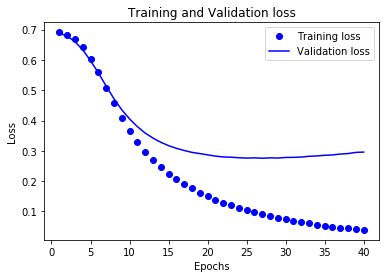

In [132]:
import matplotlib.pyplot as plt

acc = history.history['acc']
#acc
val_acc = history.history['val_acc']
#val_acc
loss = history.history['loss']
#loss
val_loss = history.history['val_loss']
#val_loss

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# "b" is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

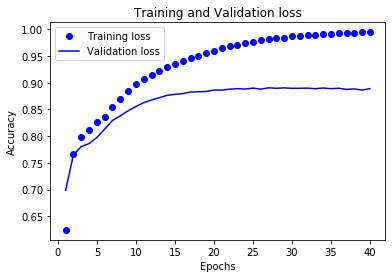

In [134]:
plt.clf() # clear the figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

# "bo" is for "blue dot"
plt.plot(epochs, acc_values, 'bo', label='Training loss')
# "b" is for "solid blue line"
plt.plot(epochs, val_acc_values, 'b', label='Validation loss')
plt.title("Training and Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
